In [ ]:
%matplotlib inline

In [ ]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape
faces

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

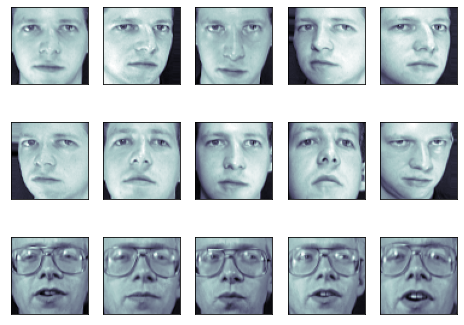

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))

for i in range(15):
  ax = fig.add_subplot(3, 5, i+1 , xticks=[], yticks=[])
  ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
faces.target, random_state=0)
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

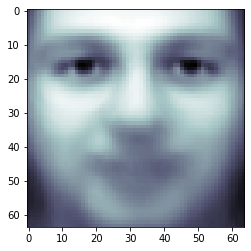

In [ ]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),

cmap=plt.cm.bone)

In [ ]:
print(pca.components_.shape)

(150, 4096)


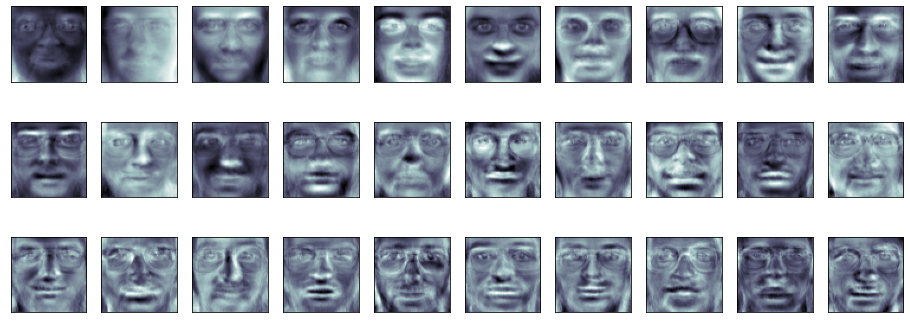

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
  ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
            cmap=plt.cm.bone)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 150)


In [ ]:
print(X_test_pca.shape)

(100, 150)


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

GaussianNB()

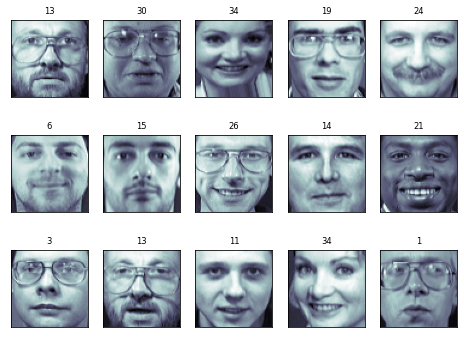

In [ ]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(faces.images[0].shape),
            cmap=plt.cm.bone)

  y_pred = gnb.predict(X_test_pca[i, np.newaxis])[0]
  color = ('black' if y_pred == y_test[i] else 'red')
  ax.set_title(y_pred, fontsize='small', color=color)

In [ ]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred,average="weighted"))
print(metrics.recall_score(y_test,y_pred,average="weighted"))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       1.00      0.75      0.86         4
           2       0.50      0.50      0.50         2
           3       0.11      1.00      0.20         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       0.25      1.00      0.40         1
          10       1.00      1.00      1.00         4
          11       0.50      1.00      0.67         1
          12       0.50      1.00      0.67         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         6
          19       0.75    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),

('gnb', GaussianNB())])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


***Exercise 1***

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
from sklearn import metrics
y_pred = gnb.predict(X_test)
# print(metrics.classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred,average="weighted"))
print(metrics.recall_score(y_test,y_pred,average="weighted"))
#Accuracy of the model decreases
#macro average decreases
#weighted average decreases


0.78
0.8384285714285714
0.78


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Exercise 2***

In [ ]:
iris = datasets.load_iris()
iris.data.shape

(150, 4)

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=4)
X_new = pca.fit_transform(iris.data)
X_new.shape

(150, 4)

In [ ]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

***Exercise 3***

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, random_state=0)
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
print(pca.fit(X_train))

PCA(n_components=3)


In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(112, 3)
(38, 3)


***Exercise 4***

**Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
y_pred = gnb.predict(X_test_pca)

In [ ]:
from sklearn import metrics
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred,average="weighted"))
print(metrics.recall_score(y_test,y_pred,average="weighted"))

Confusion Matrix:
 [[13  0  0]
 [ 0 14  2]
 [ 0  1  8]]
0.9210526315789473
0.9245614035087719
0.9210526315789473


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_pca,y_train)
y_pred = dtc.predict(X_test_pca)

In [ ]:
from sklearn import metrics
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, y_pred))
print("Report:\n",metrics.classification_report(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred,average="weighted"))
print(metrics.recall_score(y_test,y_pred,average="weighted"))

Confusion Matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

0.9736842105263158
0.9763157894736842
0.9736842105263158


**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train_pca,y_train)
y_pred = model.predict(X_test_pca)

In [ ]:
from sklearn import metrics
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, y_pred))
print("Report:\n",metrics.classification_report(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred,average="weighted"))
print(metrics.recall_score(y_test,y_pred,average="weighted"))

Confusion Matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

0.9736842105263158
0.9763157894736842
0.9736842105263158
